# Generating Data

In [1]:
import numpy as np
import random
import pandas as pd
import seaborn as sns
#5000
dynamic_level = np.random.normal(2, 0.25, 5000)  
resistance = np.random.normal(18, 1,5000) #
input_pressure = np.random.uniform(10, 20,5000)# -log(x) till 700
motor_load = np.random.uniform(50, 100,5000) ## % linear up till 1400 ~ 115, 
motor_temperature = np.random.normal(30, 1,5000)# second linear upping lower border
operating_current = np.random.uniform(20, 30,5000)
control_station_power = np.random.uniform(80,120,5000)
current_frequency = np.random.normal(48.5, 0.5,5000)
active_power = np.random.uniform(80, 100,5000) ## kilowatts linear up till 1300 ~ 115, 
vibration_axis = np.random.uniform(0.1, 0.5,5000)# at 600 iter we detect increasing(slightly) linear trend, at 1000 iter we detect quadratic function till 1200 that will reach critical value 0.65

"""
for i in range(20):
    if (i%2==0):
        resistance=np.append(resistance,(np.random.normal(int(np.mean(resistance))+np.random.normal(1,1,1),1,100)))
        input_pressure=np.append(input_pressure, np.random.uniform(int(np.min(input_pressure))+np.random.normal(1,0,1),int(np.max(input_pressure))+np.random.normal(1,0,1),100))
    motor_load = np.append(motor_load,np.random.uniform(int(np.min(motor_load))+np.random.normal(1,0,1),int(np.max(motor_load))+np.random.normal(1,0,1),50))
    motor_temperature=np.append(motor_temperature,np.random.uniform(int(np.min(motor_temperature))+np.random.normal(1,0,1),int(np.max(motor_temperature))+np.random.normal(1,0,1),50))
    vibration_axis = np.append(vibration_axis,np.random.uniform(int(np.min(vibration_axis))+np.random.normal(1,0,1),int(np.max(vibration_axis))+np.random.normal(1,0,1),50))
"""
#df = pd.DataFrame({'dynamic_level':dynamic_level, 'resistance':resistance,'input_pressure':input_pressure,'motor_load':motor_load,'motor_temperature':motor_temperature,'operating_current':operating_current,
#                'control_station_power':control_station_power,'current_frequency':current_frequency,'active_power':active_power,'vibration_axis':vibration_axis})



'\nfor i in range(20):\n    if (i%2==0):\n        resistance=np.append(resistance,(np.random.normal(int(np.mean(resistance))+np.random.normal(1,1,1),1,100)))\n        input_pressure=np.append(input_pressure, np.random.uniform(int(np.min(input_pressure))+np.random.normal(1,0,1),int(np.max(input_pressure))+np.random.normal(1,0,1),100))\n    motor_load = np.append(motor_load,np.random.uniform(int(np.min(motor_load))+np.random.normal(1,0,1),int(np.max(motor_load))+np.random.normal(1,0,1),50))\n    motor_temperature=np.append(motor_temperature,np.random.uniform(int(np.min(motor_temperature))+np.random.normal(1,0,1),int(np.max(motor_temperature))+np.random.normal(1,0,1),50))\n    vibration_axis = np.append(vibration_axis,np.random.uniform(int(np.min(vibration_axis))+np.random.normal(1,0,1),int(np.max(vibration_axis))+np.random.normal(1,0,1),50))\n'

# Group event 1

## Задаем линейный тренд motor_load

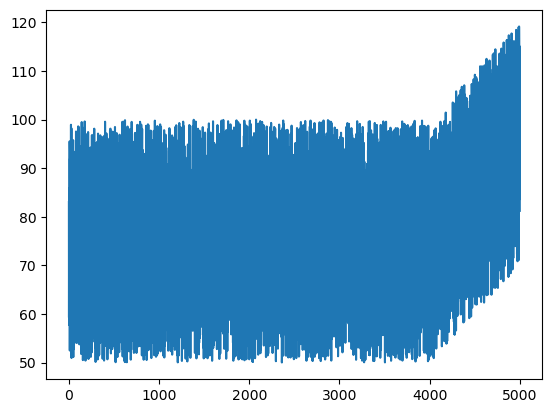

In [2]:
### Критическое значение - 120. Функция работает так: с 4000 итерации идет линейный тренд до критического значения (из-за разброса может как превышать, так и не дойти до критического значения)


def define_motor_load_uniform(min,max,n,n_trend):
    crit_max=120
    k=(crit_max-max)/n_trend
    motor_load = np.random.uniform(min, max,n)
    for i in range(n_trend):
        motor_load = np.append(motor_load, np.random.uniform(min, max,1)+k*i)

        #motor_load = np.append(motor_load,np.random.uniform(int(np.min(motor_load))+np.random.normal(1,0,1)+trend,int(np.max(motor_load))+np.random.normal(1,0,1)+trend,1))

    sns.lineplot(data=motor_load)
    
    return motor_load
motor_load=define_motor_load_uniform(50,100,4000,1000)

## Задаем линейный тренд active_power


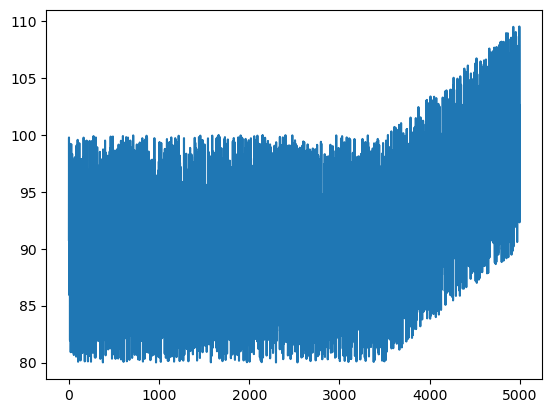

In [3]:
def define_motor_load_uniform(min,max,n,n_trend):
    crit_max=110
    k=(crit_max-max)/n_trend
    active_power = np.random.uniform(min, max,n)
    for i in range(n_trend):
        active_power = np.append(active_power,np.random.uniform(min, max,1)+k*i)
    #print(max(motor_load))
    sns.lineplot(data=active_power)
    return active_power
active_power=define_motor_load_uniform(80,100,3500,1500)


# Group event 2

[31.82402849] 31.824028488464013


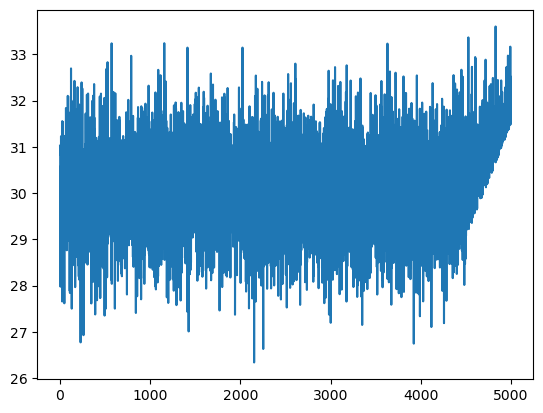

In [4]:
def define_motor_temperature_normal(mean,std,n,trend,n_trend):
    motor_temperature = np.random.normal(mean, std,n)
    crit_max=35
    #k=(crit_max-max)/n_trend
    for i in range(n_trend):
        crit_value=29+trend*i
        while True:
            a=np.random.normal(30,1,1)
            if (a<=crit_value):
                 a=np.random.normal(crit_value,1,1)
            else:
                break
        motor_temperature = np.append(motor_temperature,a)
    print(a,motor_temperature[-1])
    sns.lineplot(data=motor_temperature)
    return motor_temperature
motor_temperature=define_motor_temperature_normal(30,1,4500,0.005,500)


# Group event 3

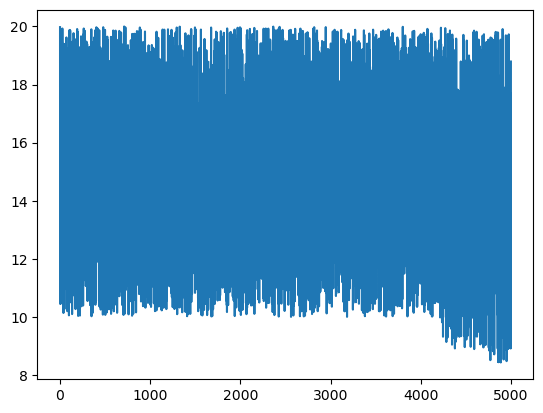

In [5]:
def define_input_pressure_uniform(min,max,n,trend,n_trend):
    input_pressure = np.random.uniform(min, max,n)
    for i in range(1,n_trend+1):
        input_pressure = np.append(input_pressure,np.random.uniform(10+np.random.normal(1,0,1)-i**0.15,20+np.random.normal(1,0,1)-i**0.01,1))
    sns.lineplot(data=input_pressure)
    return input_pressure
input_pressure=define_input_pressure_uniform(10,20,4200,1,800)

# Group event 4

[0.0256128  0.00212754]
[29.26780606]


D:\work\conda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


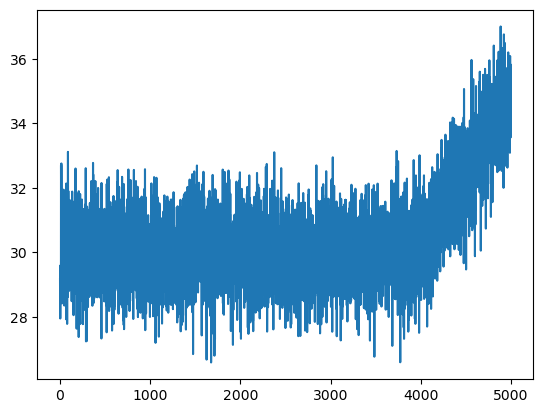

In [6]:
operating_current = np.random.uniform(20, 30,5000)
def define_g4_mt_normal(mean,std,n,trend,n_trend):
    g4_mt = np.random.normal(mean, std,n)
    for i in range(n_trend):
        g4_mt = np.append(g4_mt,np.random.normal(mean,std,1)+trend*i)
    sns.lineplot(data=g4_mt)
    return g4_mt
g4_mt=define_g4_mt_normal(30,1,4000,0.005,1000)
g4_ml=motor_load
g4_oc=operating_current
import pandas
from sklearn import linear_model

df =  pd.DataFrame({'g4_mt': list(g4_mt),
        'g4_ml': list(g4_ml),
          'g4_oc':list(g4_oc)})

X = df[['g4_ml', 'g4_oc']]
y = df['g4_mt']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)

predictedCO2 = regr.predict([[30, 25]])

print(predictedCO2)

# Group event 5

Critical value reached at: 4961


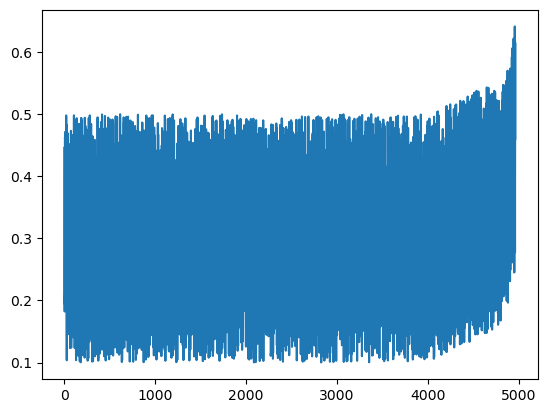

In [7]:
def define_vibration_axis_uniform(min,max,n,n_trend,trend_q,q_trend_n):
    vibration_axis = np.random.uniform(min, max,n)
    crit_value_linear=0.55
    crit_value_quadratic=0.65
    k=(crit_value_linear-max)/n_trend
    for i in range(n_trend):
        vibration_axis = np.append(vibration_axis,np.random.uniform(min,max,1)+k*i)
    for i in range(1,q_trend_n):
        new_value=np.random.uniform(np.min(vibration_axis[-100:]),np.max(vibration_axis[-100:]),1)+(trend_q*i)**2
        if (new_value>=0.65):
            break
        vibration_axis = np.append(vibration_axis,new_value)
    sns.lineplot(data=vibration_axis)
    print("Critical value reached at:",len(vibration_axis))
    return vibration_axis
vibration_axis=define_vibration_axis_uniform(0.1,0.5,4000,700,0.0008,300)

# Packing all data

In [8]:
#motor_load,active_power,motor_temperature,input_pressure,g4_mt,g4_ml,g4_oc,vibration_axis
motor_load_series=pd.Series(motor_load)
active_power_series=pd.Series(active_power)
motor_temperature_series=pd.Series(motor_temperature)
input_pressure_series=pd.Series(input_pressure)
g4_mt_series=pd.Series(g4_mt)
g4_ml_series=pd.Series(g4_ml)
g4_oc_series=pd.Series(g4_oc)
vibration_axis_series=pd.Series(vibration_axis)


import pandas as pd
df = pd.DataFrame()

df = pd.concat([motor_load_series,active_power_series,motor_temperature_series,input_pressure_series,g4_mt_series,g4_ml_series,g4_oc_series,vibration_axis_series], ignore_index=True, axis=1)

df.to_excel('output.xlsx',index = False)